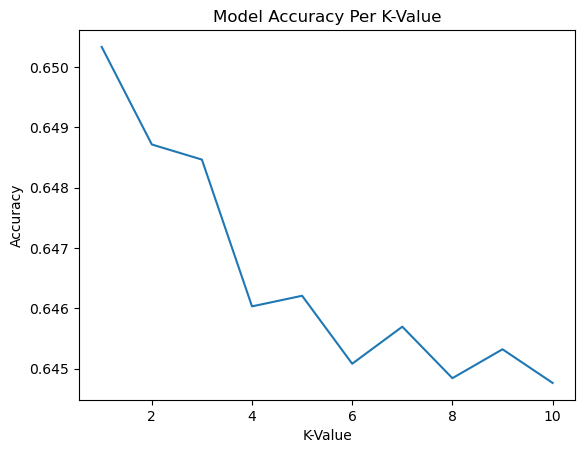

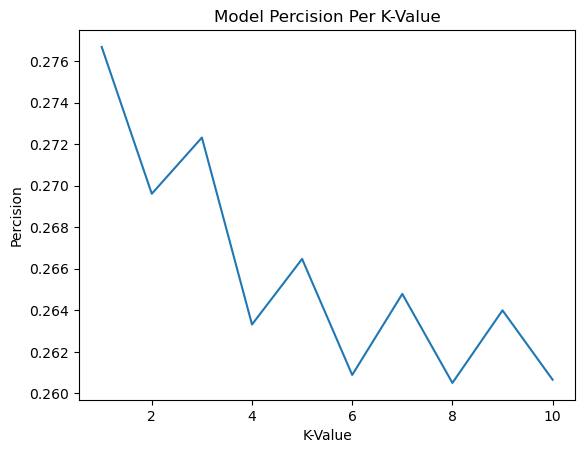

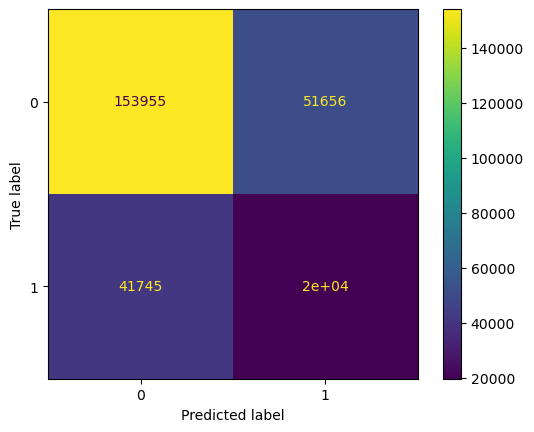

Accuracy Rate for Max Accuracy: 0.650334125751081


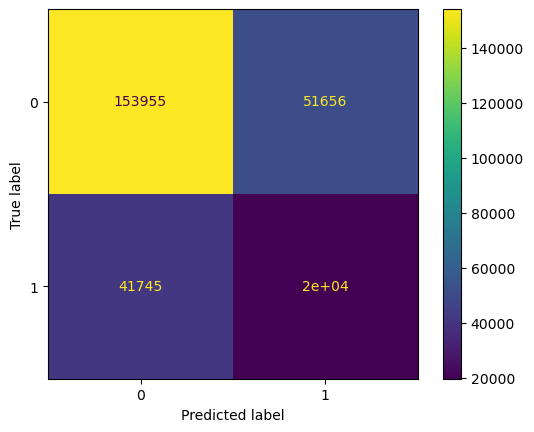

Accuracy Rate for Max Percision: 0.650334125751081


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ast
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

data = pd.read_csv("HAR/ppg+dalia/data/PPG_FieldStudy/S1/S1_E4/ACC_with_activity_denoised.csv")
tester = pd.read_csv("HAR/ppg+dalia/data/PPG_FieldStudy/S2/S2_E4/ACC_with_activity_denoised.csv")

allFeatures  = [col for col in data.columns if col not in ['Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0',
       'datetime', "activity"]]
X_train = data[allFeatures].to_numpy()
y_train = data["activity"].to_numpy()

X_val = tester[allFeatures].to_numpy()
y_val = tester["activity"].to_numpy()


# Normalize
X_train = StandardScaler().fit_transform(X_train)
X_val = StandardScaler().fit_transform(X_val)

# Used to find the k-value with highest accuracy
k = np.arange(1,11)
accuracy = np.array([])
percision = np.array([])
maxAccK = 0
maxPerk = 0
maxAcc = 0
maxPer = 0
for i in k:
    knn = KNeighborsClassifier(i)
    knn.fit(X_train, y_train)
    acc = (accuracy_score(y_val, knn.predict(X_val)))
    per = precision_score(y_val, knn.predict(X_val))
    accuracy = np.append(accuracy, acc)
    percision = np.append(percision, per)
    if acc > maxAcc:
        maxAccK = i
        maxAcc = acc
    if per > maxPer:
        maxPerK = i
        maxPer = per

plt.plot(k, accuracy)
plt.title("Model Accuracy Per K-Value")
plt.xlabel("K-Value")
plt.ylabel("Accuracy")
plt.show()

plt.plot(k, percision)
plt.title("Model Percision Per K-Value")
plt.xlabel("K-Value")
plt.ylabel("Percision")
plt.show()


# Using general KNN model
knn = KNeighborsClassifier(maxAccK)
knn.fit(X_train, y_train)

# y_pred = knn.predict(X_val)
y_pred = knn.predict(X_val)
cmat = confusion_matrix(y_val, y_pred) #validate model predictions with actual y values
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmat, display_labels = [0, 1])
cm_display.plot()
plt.show()

print("Accuracy Rate for Max Accuracy: " + str(format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat)))))

knn = KNeighborsClassifier(maxPerK)
knn.fit(X_train, y_train)

# y_pred = knn.predict(X_val)
y_pred = knn.predict(X_val)
cmat = confusion_matrix(y_val, y_pred) #validate model predictions with actual y values
cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = cmat, display_labels = [0, 1])
cm_display.plot()
plt.show()

print("Accuracy Rate for Max Percision: " + str(format(np.divide(np.sum([cmat[0,0],cmat[1,1]]),np.sum(cmat)))))